
## 1. Iterable and Iterator

* Iterable is an object, which one can iterate over. It generates an Iterator when passed to __iter() method. 

* Iterator is an object, which is used to iterate over an iterable object using __next__() method. Iterators have __next__() method, which returns the next item of the object.

###### int is not interable but string/list is interable

The dir()  function returns all properties and methods of the specified object, without the values. This function will return all the properties and methods, even built-in properties which are default for all objec

In [1]:
num = [1,2,3]
print(dir(num)) # list contains __iter__ method

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [2]:
next(num)  # because it is iterable,list not iterator , not conatins next method , 

TypeError: 'list' object is not an iterator

In [3]:
nums = [1,2,3]
i_nums = iter(nums) #passed iter object , it conatins , __next__ method
print(dir(i_nums)) # now i_nums has __next__ method so that we can iterate over  it

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__length_hint__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__']


In [4]:
print(next(i_nums))
print(next(i_nums))
print(next(i_nums))
print(next(i_nums)) # stooped iteration beacuse we have only three items in list 

1
2
3


StopIteration: 

In [5]:
nums = [1,2,3]
i_nums = iter(nums)
while True:
    try:
        num = next(i_nums)
        print(num)
    except StopIteration: 
        break

1
2
3


#### Ex. 1

In [6]:
s= 'hello'
s_iter = iter(s)# generate an iterator by passing string(interable) to iter()
s_iter

In [7]:
print(next(s_iter))
print(next(s_iter))
print(next(s_iter))
print(next(s_iter))
print(next(s_iter))

h
e
l
l
o


####  Creating myrange class using __iter__ and __next__ method

In [8]:
class MyRange:

    def __init__(self, start, end):
        self.value = start
        self.end = end
        
# __iter__ returns the iterator object itself.
    def __iter__(self): 
        return self
    
# the __next__ method returns the next value from the iterator
# If there is no more items to return then it raises a StopIteration exception.
    def __next__(self):
        if self.value >= self.end:
            raise StopIteration
        current = self.value
        self.value += 1
        return current

In [9]:
n_list = MyRange(1,10)
n_list

In [10]:
print(next(n_list))
print(next(n_list))
print(next(n_list))

1
2
3


In [11]:
print(list(n_list))

[4, 5, 6, 7, 8, 9]


## 2. generators

* The generator is same as iterator that allows you to write iterators in a much easier syntax where you do not have to write classes with __iter__() and __next__() methods.


* contains yield() keyword that allow you to generate sequences of values over time.

####  examples 1



In [12]:
def simple_gen():
    for x in range(3):
        yield x

* The return value of the function will actually be a generator. Inside the for loop when the execution reaches the yield statement, the value of low is returned and the generator state is suspended. During the second next call, the generator resumes from the value at which it stopped earlier and increases this value by one. It continues with the while loop and comes to the yield statement again.

In [13]:
g = simple_gen()
print(next(g))
print(next(g))
print(next(g))
print(next(g))

0
1
2


StopIteration: 

In [14]:
print(list(simple_gen()))

[0, 1, 2]


#### Ex 2

In [15]:
def series_generator(low, high):
    while low <= high:
       yield low
       low += 1

n_list = []
for num in series_generator(1,10):
    n_list.append(num)

print(n_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


#### Ex 3  difference between return the dictonary by normal return and yield keyword

In [20]:
# function to check meory utilization
def memory_usage_psutil():
    # return the memory usage in MB
    process = psutil.Process(os.getpid())
    mem = process.memory_info() [0] / float(2 ** 20)
    return mem

In [25]:
import random
import time
import psutil
import os

In [31]:
names = ['John', 'Corey', 'Adam', 'Steve', 'Rick', 'Thomas']
majors = ['Math', 'Engineering', 'CompSci', 'Arts', 'Business']

In [32]:
print(f'Memory (Before):{memory_usage_psutil()}')
def people_list(num_people):
    result = []
    for i in range(num_people):
        person = {
                    'id': i,
                    'name': random.choice(names),
                    'major': random.choice(majors)
                }
        result.append(person)
    return result
t1 = time.clock()
people = people_list(1000000)
t2 = time.clock()

print(f'Memory (After):{memory_usage_psutil()}')
print(f'Total time taken : {t2-t1}')

Memory (Before):67.8359375


C:\Users\Uttam\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


Memory (After):351.88671875
Total time taken : 3.6662125999999944


C:\Users\Uttam\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [35]:
print(f'Memory (Before):{memory_usage_psutil()}')
def people_generator(num_people):
    for i in xrange(num_people):
        person = {
                    'id': i,
                    'name': random.choice(names),
                    'major': random.choice(majors)
                }
        yield person
        
t1 = time.clock()
people = people_generator(1000000)
t2 = time.clock()

print(f'Memory (After):{memory_usage_psutil()}')
print(f'Total time taken : {t2-t1}')

Memory (Before):66.796875
Memory (After):66.796875
Total time taken : 0.0005880999999874348


C:\Users\Uttam\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Uttam\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


## 3. List comprehension

* List comprehensions are used for creating new lists from other iterables.

In [38]:
S = [x**2 for x in range(10)]
print(S)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [39]:
M = [x for x in S if x % 2 == 0]
print(M)

[0, 4, 16, 36, 64]


In [56]:
list_of_list = [[1,2,3],[4,5,6],[7,8]]

In [57]:
# without list comp
def num(list_of_list):
    a = []
    for i in list_of_list:
        for j in i:
            a.append(j)
    return a
list(num(list_of_list))

[1, 2, 3, 4, 5, 6, 7, 8]

In [58]:
# Flatten `list_of_list`
[y for x in list_of_list for y in x]

[1, 2, 3, 4, 5, 6, 7, 8]

* take the list elements ( y ) of the nested lists ( x ) in list_of_list and return a list of those list elements y that are comprised in x.

In [62]:
#Using if with List Comprehension
num_list = [y for y in range(100) if y % 2 == 0 if y % 5 == 0]
print(num_list)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]


In [63]:
#Nested IF with List Comprehension
obj = ["Even" if i%2==0 else "Odd" for i in range(10)]
print(obj)

['Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd']


In [64]:
#Using Lambda functions inside List
letters = list(map(lambda x: x, 'human'))
print(letters)

['h', 'u', 'm', 'a', 'n']


In [65]:
# transpose of matrix using list comp
matrix = [[1, 2], [3,4], [5,6], [7,8]]
transpose = [[row[i] for row in matrix] for i in range(2)]
print (transpose)

[[1, 3, 5, 7], [2, 4, 6, 8]]


## 4. Zip

* The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.

In [84]:
number_list = [1, 2, 3]
str_list = ['one', 'two', 'three']

# No iterables are passed
result = zip()
list(result)

[]

In [85]:
# Two iterables are passed
result = zip(number_list, str_list)
list(result)

[(1, 'one'), (2, 'two'), (3, 'three')]

In [86]:
a= [1,2,3]
zipped = zip(a)
list(zipped)

[(1,), (2,), (3,)]

###### Different number of iterable elements

* If the passed iterators have different lengths, the iterator with the least items decides the length of the new iterator.

In [87]:
numbersList = [1, 2, 3]
str_list = ['one', 'two']
numbers_tuple = ('ONE', 'TWO', 'THREE', 'FOUR')

result = zip(numbersList, numbers_tuple)
list(result)

[(1, 'ONE'), (2, 'TWO'), (3, 'THREE')]

In [88]:
## Notice, the size of numbersList and numbers_tuple is different
result = zip(numbersList, str_list, numbers_tuple)
list(result)

[(1, 'one', 'ONE'), (2, 'two', 'TWO')]

* The * operator can be used in conjunction with zip() to unzip the list.
 
##### zip(*zippedList)

In [89]:
coordinate = ['x', 'y', 'z']
value = [3, 4, 5]

result = zip(coordinate, value)
x = list(result)
print(x)

[('x', 3), ('y', 4), ('z', 5)]


In [90]:
c, v =  zip(*x)
print('c =', c)
print('v =', v)

c = ('x', 'y', 'z')
v = (3, 4, 5)


## 5. enumerate()

##### enumerate() method takes two parameters:

* iterable - a sequence, an iterator, or objects that supports iteration
* start (optional) - enumerate() starts counting from this number. If start is omitted, 0 is taken as start.

In [95]:
g = ['bread', 'milk', 'butter']
eg = enumerate(g)

print(type(eg))

# converting to list
print(list(eg))

<class 'enumerate'>
[(0, 'bread'), (1, 'milk'), (2, 'butter')]


In [96]:
# changing the default counter
eg = enumerate(g, 10)
print(list(eg))

[(10, 'bread'), (11, 'milk'), (12, 'butter')]


In [97]:
word = 'abcde'
for i in enumerate(word):
    print(i)

(0, 'a')
(1, 'b')
(2, 'c')
(3, 'd')
(4, 'e')


In [98]:
for i, v in enumerate(word):
    print(f'word number {i} and value : {v}')

word number 0 and value : a
word number 1 and value : b
word number 2 and value : c
word number 3 and value : d
word number 4 and value : e


## 6. Map() function

The map() function applies a given to function to each item of an iterable and returns a list of the results.
The returned value from map() (map object) can then be passed to list or set.

##### map(fun, iter)

In [102]:
#ex 1
def square(num):
    return num**2
my_nums = [1,2,3,4,5]
map(square,my_nums)

In [103]:
list(map(square,my_nums))

[1, 4, 9, 16, 25]

##### EX: 2

In [105]:
num = (1, 2, 3, 4)
result = map(lambda x: x*x, num)
print(result)

# converting map object to set
set(result)

{1, 4, 9, 16}

#### Ex : 3

In [107]:
num1 = [4, 5, 6]
num2 = [5, 6, 7]

result = map(lambda n1, n2: n1+n2, num1, num2)# map(lambda func ,iterator)
print(list(result))

[9, 11, 13]


#### Ex : 4

In [110]:
list('sat')

['s', 'a', 't']

In [111]:
# List of strings 
l = ['sat', 'bat', 'cat', 'mat'] 
  
# map() can listify the list of strings individually 
test = list(map(list, l)) 
print(test) 

[['s', 'a', 't'], ['b', 'a', 't'], ['c', 'a', 't'], ['m', 'a', 't']]


## 7.  Filter() Method

* The filter() method filters the given sequence with the help of a function that tests each element in the sequence to be true or not.

##### Map takes all objects in a list and allows you to apply a function to it whereas Filter takes all objects in a list and runs that through a function to create a new list with all objects that return True in that function.


##### EX 1:

In [112]:
def chk_even(num):
    return num%2==0
num = [0,1,2,3,4,5,6,7,8,9]
list(filter(chk_even, num))

[0, 2, 4, 6, 8]

In [113]:
# a list contains both even and odd numbers.  
seq = [0, 1, 2, 3, 5, 8, 13] 
  
# result contains odd numbers of the list 
result = filter(lambda x: x % 2 != 0, seq) 
print(list(result)) 

[1, 3, 5, 13]


In [114]:
# list of letters
letters = ['a', 'b', 'd', 'e', 'i', 'j', 'o']

# function that filters vowels
def filterVowels(letter):
    vowels = ['a', 'e', 'i', 'o', 'u']

    if(letter in vowels):
        return True
    else:
        return False

list(filter(filterVowels, letters))

['a', 'e', 'i', 'o']

#### Filter without filter function 

In [116]:
# random list
randomList = [1, 'a', 0, False, True, '0'] 

filteredList = filter(None, randomList) # no filter function ,  get the elements which are true 

print('The filtered elements are:')
for element in filteredList:
    print(element)

The filtered elements are:
1
a
True
0


## 8. Reduce() method

reduce() is to take an existing function, apply it cumulatively to all the items in an iterable, and generate a single final value

In [120]:
 # initializing list 
from functools import reduce
lst = [ 47,11, 42,13 ] 
reduce(lambda x, y: x+y , lst)

113

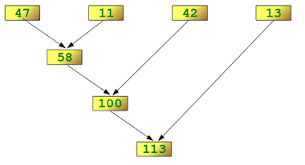

In [121]:
lst = [1,2,3,4,5]
def num_mul(a,b):
    return a*b
reduce(num_mul, lst)

120